In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from sklearn.linear_model import lasso_path, Ridge
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


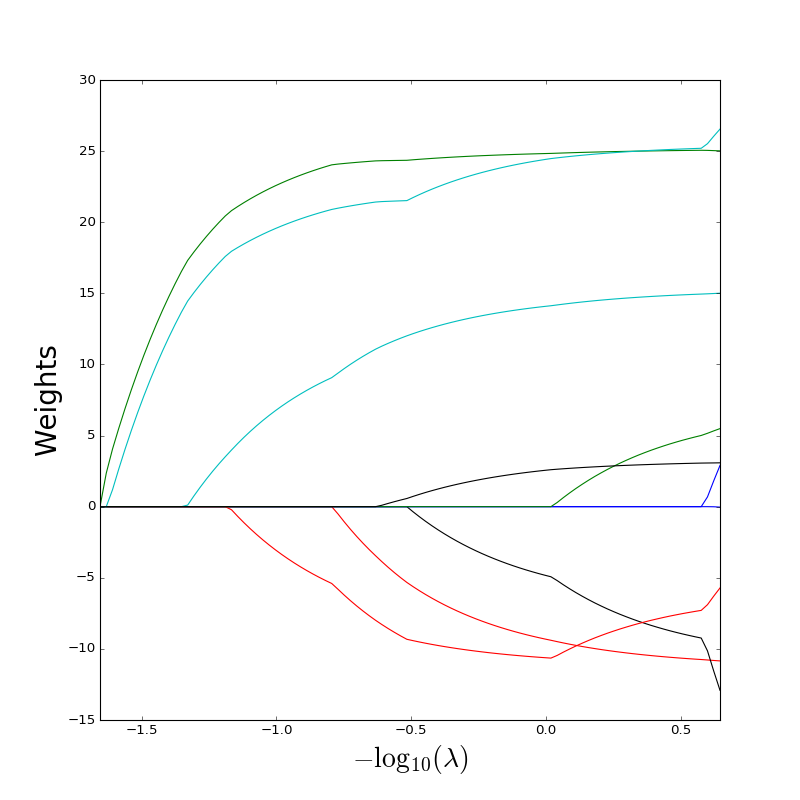

/home/varunk/.software/ml-stuff/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X /= X.std(axis=0)

eps=5e-3

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

xmin = - np.max(np.log10(alphas_lasso))
xmax = -np.min(np.log10(alphas_lasso))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(xmin, xmax)
ax.set_color_cycle(2*['b', 'r', 'g', 'c', 'k'])
l1 = ax.plot(-np.log10(alphas_lasso), coefs_lasso.T)
ax.set_xlabel('$-\log_{10}(\lambda)$', fontsize=25)
ax.set_ylabel('Weights', fontsize=25)

In [3]:
n_alphas = 200
alphas_ridge = np.logspace(-2,  5, n_alphas)
ridge = Ridge(fit_intercept=False)

coefs_ridge = np.zeros([n_alphas, X.shape[1]])

for (i, a) in enumerate(alphas_ridge):
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs_ridge[i] = ridge.coef_

<IPython.core.display.Javascript object>


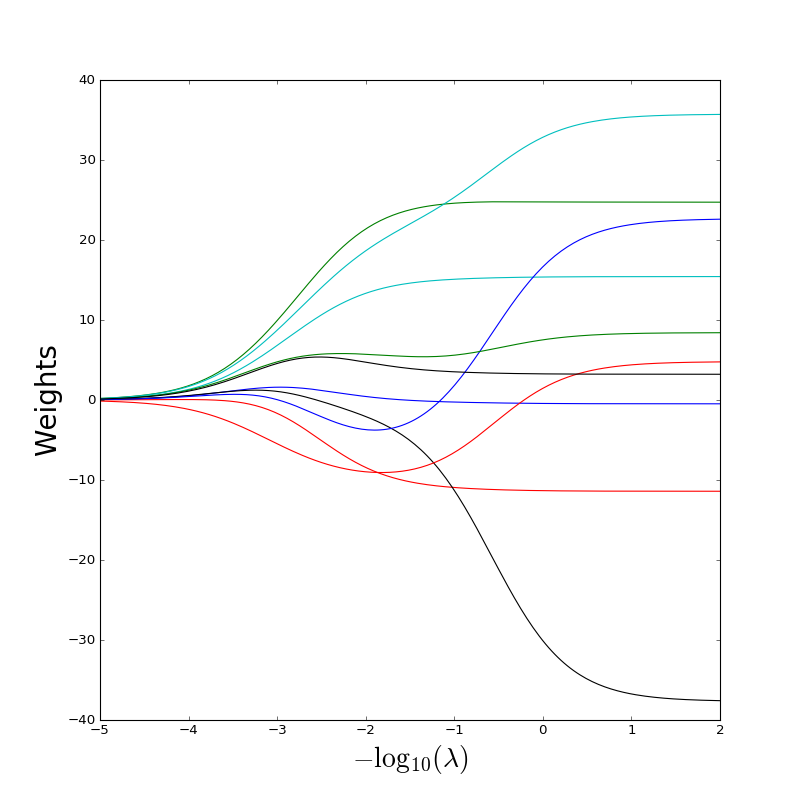

In [4]:
xmin2 = - np.max(np.log10(alphas_ridge))
xmax2 = -np.min(np.log10(alphas_ridge))
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_xlim(xmin2, xmax2)

ax2.set_color_cycle(2*['b', 'r', 'g', 'c', 'k'])
ax2.plot(-np.log10(alphas_ridge), coefs_ridge)
ax2.set_xlabel('$-\log_{10}(\lambda)$', fontsize=25)
ax2.set_ylabel('Weights', fontsize=25)